In [23]:
import numpy as np
import gzip
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

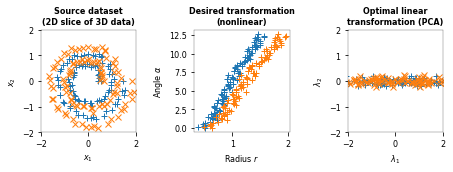

In [79]:
rs = np.linspace(0.5, 1.5, 100) + np.random.normal(0, 0.05, 100)
αs = np.linspace(0.0, 4.0 * np.pi, 100) + np.random.normal(0, 0.05, 100)

xs0 = rs * np.cos(αs)
ys0 = rs * np.sin(αs)
zs0 = np.random.normal(0, 0.1, 100)

xs1 = 1.25 * rs * np.cos(αs)
ys1 = 1.25 * rs * np.sin(αs)
zs1 = np.random.normal(0, 0.1, 100)

X = np.array((
        np.concatenate((xs0, xs1)),
        np.concatenate((xs0, xs1)),
        np.concatenate((zs0, zs1)),
    )).T


# Compute the principal component vectors
X_zero_mean = X - np.mean(X, axis=0)
X_cov = (X_zero_mean.T @ X_zero_mean) / (X.shape[0] - 1)
D, V = np.linalg.eigh(X_cov)
D = D[::-1]
V = V.T[::-1, :]
V = V / np.linalg.norm(V, axis=0)

Xp = X @ V.T

fig = plt.figure(figsize=(6.5, 2.5))
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2)
ax2 = fig.add_subplot(1, 3, 3)

axs = [ax0, ax1, ax2]

axs[0].plot(xs0, ys0, '+')
axs[0].plot(xs1, ys1, 'x')
axs[0].set_xlabel('')
axs[0].set_xlim(-2, 2)
axs[0].set_ylim(-2, 2)
axs[0].set_xlabel("$x_1$")
axs[0].set_ylabel("$x_2$")
axs[0].set_title('Source dataset\n(2D slice of 3D data)')

axs[1].set_title('Desired transformation\n(nonlinear)')
axs[1].plot(rs, αs, '+')
axs[1].plot(1.25 * rs, αs, '+')
axs[1].set_xlabel("Radius $r$")
axs[1].set_ylabel("Angle $\\alpha$")


axs[2].set_title('Optimal linear\ntransformation (PCA)')
axs[2].plot(Xp[:100, 0], Xp[:100, 1], '+')
axs[2].plot(Xp[100:, 0], Xp[100:, 1], 'x')
axs[2].set_xlabel("$\\lambda_1$")
axs[2].set_ylabel("$\\lambda_2$")
axs[2].set_xlim(-2, 2)
axs[2].set_ylim(-2, 2)

fig.tight_layout()
fig.savefig('../pca_limitations_plots.pdf')